<a href="https://colab.research.google.com/github/Chiebukar/Deep-Learning/blob/main/dog_cat_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d arnaudeq/cats-vs-dogs-5000

 96% 505M/527M [00:06<00:00, 68.9MB/s]
100% 527M/527M [00:06<00:00, 89.6MB/s]


In [9]:
!ls -d $PWD/*

/content/cats-vs-dogs-5000.zip	/content/kaggle.json  /content/sample_data


In [10]:
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: dogs_cats_sample_5000/train/dogs/dog.3288.jpg  
  inflating: dogs_cats_sample_5000/train/dogs/dog.3289.jpg  
  inflating: dogs_cats_sample_5000/train/dogs/dog.3298.jpg  
  inflating: dogs_cats_sample_5000/train/dogs/dog.3299.jpg  
  inflating: dogs_cats_sample_5000/train/dogs/dog.330.jpg  
  inflating: dogs_cats_sample_5000/train/dogs/dog.3300.jpg  
  inflating: dogs_cats_sample_5000/train/dogs/dog.3301.jpg  
  inflating: dogs_cats_sample_5000/train/dogs/dog.3302.jpg  
  inflating: dogs_cats_sample_5000/train/dogs/dog.3303.jpg  
  inflating: dogs_cats_sample_5000/train/dogs/dog.3307.jpg  
  inflating: dogs_cats_sample_5000/train/dogs/dog.331.jpg  
  inflating: dogs_cats_sample_5000/train/dogs/dog.3312.jpg  
  inflating: dogs_cats_sample_5000/train/dogs/dog.3313.jpg  
  inflating: dogs_cats_sample_5000/train/dogs/dog.3314.jpg  
  inflating: dogs_cats_sample_5000/train/dogs/dog.3316.jpg  
  inflating: dogs_cats_sample_5000/t

In [11]:
!ls -d $PWD/*

/content/dogs_cats_sample_5000	/content/kaggle.json  /content/sample_data


In [12]:
train_dir = 'dogs_cats_sample_5000/train'
validation_dir  = 'dogs_cats_sample_5000/valid'

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation='relu', input_shape = (150, 150, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(512, activation ='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 512)       5

In [15]:
model.compile(loss= 'binary_crossentropy', optimizer= 'rmsprop', metrics=['accuracy'])

In [16]:
# create data generator object and set scaling
train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                                                   train_dir,
                                                   target_size = (150,150),
                                                   batch_size = 20,
                                                   class_mode = 'binary'
                                                   )

validation_generator = val_datagen.flow_from_directory(
                                                   validation_dir,
                                                   target_size = (150,150),
                                                   batch_size = 20,
                                                   class_mode = 'binary'
                                                   )

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [17]:
for data_batch, labels_batch in train_generator:
  print('data batch shape', data_batch.shape)
  print('data label shape', labels_batch.shape)
  break

data batch shape (20, 150, 150, 3)
data label shape (20,)


In [18]:
history = model.fit_generator(train_generator, steps_per_epoch=100, 
                              epochs=30, validation_data=validation_generator, 
                              validation_steps=50)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 17s 97ms/step - loss: 1.5756 - accuracy: 0.4761 - val_loss: 0.7019 - val_accuracy: 0.4880
Epoch 2/30
100/100 [==============================] - 10s 96ms/step - loss: 0.7008 - accuracy: 0.5507 - val_loss: 0.6692 - val_accuracy: 0.5970
Epoch 3/30
100/100 [==============================] - 9s 94ms/step - loss: 0.7035 - accuracy: 0.6072 - val_loss: 0.6251 - val_accuracy: 0.6240
Epoch 4/30
100/100 [==============================] - 9s 95ms/step - loss: 0.6444 - accuracy: 0.6253 - val_loss: 0.5859 - val_accuracy: 0.6860
Epoch 5/30
100/100 [==============================] - 10s 95ms/step - loss: 0.5934 - accuracy: 0.6927 - val_loss: 0.5901 - val_accuracy: 0.6740
Epoch 6/30
100/100 [==============================] - 9s 95ms/step - loss: 0.5940 - accuracy: 0.7024 - val_loss: 0.5528 - val_accuracy: 0.7320
Epoch 7/30
100/100 [==============================] - 9s 94ms/step - loss: 0.5679 - accuracy: 0.7365 - val_loss: 0.5170 - val_accuracy: 0.7

In [19]:
model.save('cats_and_dogs_small_1.h5')

In [20]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs = range(1, len(acc) + 1)

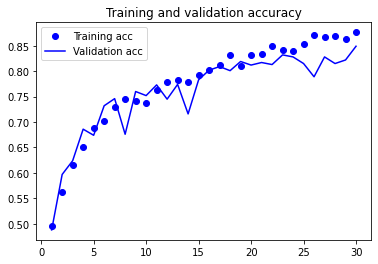

In [21]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy') 
plt.legend()

plt.show()

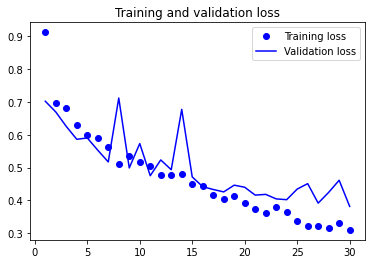

In [22]:
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend() 

plt.show()

Data Augmentation

In [23]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, 
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, 
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
train_generator= train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150,150),
                                                   batch_size = 32,
                                                   class_mode = 'binary'
                                                   )
validation_generator= val_datagen.flow_from_directory(validation_dir,
                                                      target_size = (150,150),
                                                      batch_size = 32,
                                                      class_mode = 'binary'
                                                     )

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [25]:
for data_batch, labels_batch in train_generator:
  print('data batch shape', data_batch.shape)
  print('data label shape', labels_batch.shape)
  break

data batch shape (32, 150, 150, 3)
data label shape (32,)


In [37]:
model = Sequential() 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2))) 

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2))) 

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2))) 

model.add(Flatten()) 
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [38]:
history = model.fit_generator(train_generator, steps_per_epoch=100, 
                              epochs=50, validation_data=validation_generator, 
                              validation_steps=50)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
100/100 [==============================] - 31s 304ms/step - loss: 0.6980 - acc: 0.4833 - val_loss: 0.6835 - val_acc: 0.5969
Epoch 2/50
100/100 [==============================] - 30s 300ms/step - loss: 0.6860 - acc: 0.5333 - val_loss: 0.6911 - val_acc: 0.5106
Epoch 3/50
100/100 [==============================] - 30s 300ms/step - loss: 0.6728 - acc: 0.5866 - val_loss: 0.6835 - val_acc: 0.5575
Epoch 4/50
100/100 [==============================] - 30s 298ms/step - loss: 0.6538 - acc: 0.5971 - val_loss: 0.7089 - val_acc: 0.5650
Epoch 5/50
100/100 [==============================] - 30s 296ms/step - loss: 0.6483 - acc: 0.6124 - val_loss: 0.6305 - val_acc: 0.6406
Epoch 6/50
100/100 [==============================] - 30s 297ms/step - loss: 0.6230 - acc: 0.6559 - val_loss: 0.5838 - val_acc: 0.6906
Epoch 7/50
100/100 [==============================] - 29s 295ms/step - loss: 0.6293 - acc: 0.6360 - val_loss: 0.5726 - val_acc: 0.7188
Epoch 8/50
100/100 [==============================] - 3

In [39]:
model.save('cats_and_dogs_small_2.h5')

In [41]:
acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs = range(1, len(acc) + 1)

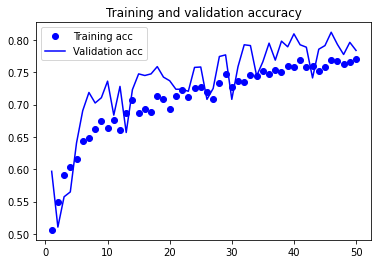

In [42]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy') 
plt.legend()

plt.show()

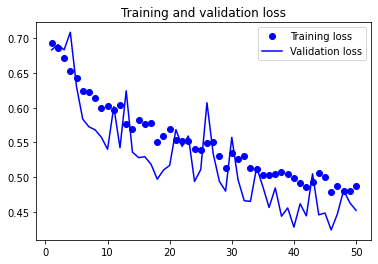

In [43]:
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend() 

plt.show()